# SMART GOAL #1

Source Link #1 : https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f <br>
Source Link #2 : https://www.youtube.com/watch?v=Sw9r8CL98N0 <br>

GAN is compromised of 2 different models, the generator and the discriminator. <br>
Generator is an unsupervised learning and takes input data and blindly creates a new "fake" data. <br>
Discriminator is a supervised learning takes the output data from the Generator and the real data. <br>
It classifies data from the Generator as real (if generator actaully generated it) or fake (if it's taken from the data set).<br>
Both the generator and discriminator will be competing against each other to train themselves. <br>
The result I will want is the discriminator will not be able to distinguish if the images generated are fake or not.

I will need to install TensorFlow onto my jupyter notebook. <br>
Here is the link to the possible models in TensorFlow : https://github.com/wiseodd/generative-models/tree/master/GAN <br>
In this case, I will need to identify which model will work best with our dataset (possible future smart goals).

#### QUESTIONS
What type of datasets does GAN take?


In [ ]:
import tensorflow as tf
import keras

# SMART GOAL #4

In [35]:
import numpy as np
np.random.seed(1000)

In [36]:
#Number max returns 0 or higher
def max(num):
    if num > 0:
        return num
    return 0

In [37]:
def determineResult (num):
    if num >= 1:
        return 1
    elif num < 1 and num > -1:
        return 0
    elif num <= -1:
        return -1

In [38]:
#randomStock starts at $100
randomStock = [100]

#There will be 1000 closing price total
#result states whether price has increased (1), decreased (-1), or same (0)
for i in range(999):
    result = 0
    openPrice = randomStock[-1]
    randomPercentWalk = 0

    if result == 0:
        randomPercentWalk = np.random.uniform(-.02,.02)
    
    #Result increased before
    elif result == 1:
        #33% it'll increase again, determines % increase/decrease
        probIncrease = np.random.randint(1,10)
        if probIncrease % 3 == 0:
            randomPercentWalk = np.random.uniform(0,.02)
        else:
            randomPercentWalk = np.random.uniform(-.02,.02)
    
    #Result decreased before
    elif result == -1:
        #33% it'll increase again, determines % increase/decrease
        probIncrease = np.random.randint(1,10)
        if probIncrease % 3 == 0:
            randomPercentWalk = np.random.uniform(-0.02,0)
        else:
            randomPercentWalk = np.random.uniform(-.02,.02)
    
    #randNum determines if increase is abnormal or not
    #if abnormal randX determines by how much times it'll multiply by
    randNum = np.random.randint(1,11)
    if randNum > 1 and randNum < 10:
        closePrice = openPrice + openPrice * randomPercentWalk
    else:
        randX = np.random.randint(2,4) * randomPercentWalk
        closePrice = openPrice + openPrice * randX
    
    #Set result
    result = determineResult(randomPercentWalk)
        
    randomStock.append(max(closePrice))
    
#Update 1 added conditional probability (result)

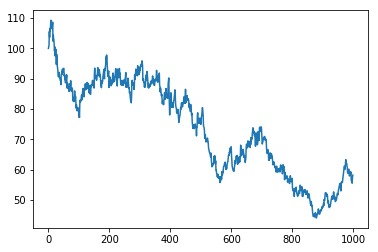

In [39]:
from matplotlib import pyplot as plt
plt.plot(randomStock)